In [1]:
import numpy as np
import pandas as pd

model_df=pd.read_csv('./home_credit_data/model_df.csv')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neighbors1 = KNeighborsClassifier(n_neighbors=1)
y=model_df['TARGET']
X=model_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','bureau_DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_count_norm','CREDIT_ACTIVE_Active_count_norm','DAYS_BIRTH','DAYS_BIRTH_GROUP','bureau_DAYS_CREDIT_min','bureau_DAYS_CREDIT_UPDATE_mean','DAYS_EMPLOYED','CREDIT_ACTIVE_Active_count','OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','BASEMENTAREA_MEDI','LIVINGAREA_AVG','bureau_DAYS_ENDDATE_FACT_min','bureau_DAYS_ENDDATE_FACT_sum','BASEMENTAREA_AVG','bureau_DAYS_CREDIT_ENDDATE_sum','LIVINGAREA_MEDI','BASEMENTAREA_MODE','bureau_DAYS_CREDIT_max','TOTALAREA_MODE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','LIVINGAREA_MODE','bureau_DAYS_CREDIT_sum','APARTMENTS_AVG','bureau_DAYS_CREDIT_UPDATE_sum','APARTMENTS_MODE','bureau_DAYS_ENDDATE_FACT_mean','APARTMENTS_MEDI','CREDIT_TYPE_Microloan_count_norm','bureau_DAYS_CREDIT_ENDDATE_mean','REG_CITY_NOT_WORK_CITY','bureau_DAYS_CREDIT_UPDATE_min','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','bureau_DAYS_CREDIT_ENDDATE_min','FLOORSMAX_AVG','CREDIT_TYPE_Credit card_count_norm','AMT_CREDIT','FLOORSMAX_MEDI','CREDIT_TYPE_Credit card_count','ELEVATORS_AVG','FLOORSMAX_MODE']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [8]:
neighbors1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
neighbors1.score(X_test, y_test)

0.598

In [16]:
neighbors5 = KNeighborsClassifier(n_neighbors=5)

neighbors5.fit(X_train,y_train)
neighbors5.score(X_test, y_test)

0.7355

## Distance and Normalize

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scalered = ss.fit_transform(X)

In [12]:
X_train_scalered, X_test_scalered, y_train, y_test = train_test_split(X_scalered, y, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scalered,y_train)
knn.score(X_test_scalered, y_test)

0.7005

## Weighting

In [14]:
from scipy import stats

neighbors5 = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [15]:
X_zscore = stats.zscore(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7005

In [17]:
neighbors_number = np.arange(1, 9)
train_score = np.empty(len(neighbors_number))
test_score = np.empty(len(neighbors_number))

In [18]:
for i, k in enumerate(neighbors_number):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_score[i] = knn.score(X_test, y_test)

In [21]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

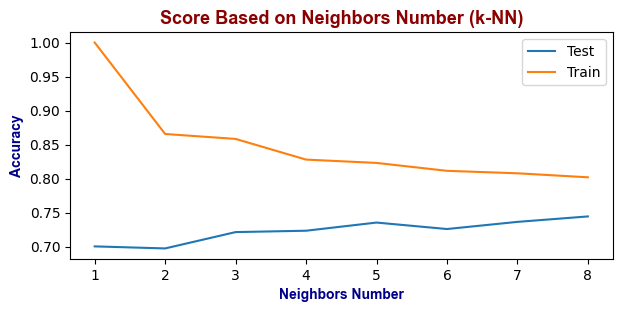

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(neighbors_number, test_score, label = 'Test')
plt.plot(neighbors_number, train_score, label = 'Train')
plt.legend()
plt.title('Score Based on Neighbors Number (k-NN)', fontdict= title_font)
plt.xlabel('Neighbors Number', fontdict= axis_font)
plt.ylabel('Accuracy', fontdict= axis_font)
plt.show()